# Инициализация

In [0]:
#@markdown - **Монтирование GoogleDrive** 
from google.colab import drive
drive.mount('GoogleDrive')

In [0]:
# #@markdown - **Размонтирование**
# !fusermount -u GoogleDrive

# 代码区

In [0]:
#@title Метод главных компонент { display-mode: "both" }
# В программе реализован метод главных компонент для снижения двумерных данных в одномерные, и максимизируя дисперсию
# Два метода:
# 1. Нахождение собственных значений и собственных векторов градиентным спуском;
# 2. Вызов встроенной функции
# Principal component analysis
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import linalg as LA


In [0]:
#@markdown - **Настройка параметров**
x_input = np.array([[1, 1, 2, 4, 2], [1, 3, 3, 4, 4]])
x_dim = x_input.shape[0]
x_cov = np.cov(x_input)
w_dim = 1

num_epoch = 50 #@param {type: "integer"}
learning_rate = 8e-2 #@param {type: "number"}

In [3]:
#@markdown - **Настройка параметров сетей**
with tf.name_scope('Input'):
    x = tf.placeholder(tf.float32, shape=[x_dim, x_dim], name='x_cov')
    w = tf.Variable(tf.random_normal(shape=[x_dim, w_dim], stddev=0.1))
    lr = tf.Variable(2.)
    m_i = tf.matrix_diag(tf.ones([x_dim]))
with tf.name_scope('Output'):
    y1 = tf.matmul((x - lr * m_i), w)
    y2 = 1 - tf.matmul(w, w, transpose_a=True)
    y = tf.reduce_sum(tf.square(y1)) + tf.reduce_sum(tf.square(y2))

# Только собственное значение около lr и соответствующий собственный вектор может быть найден
with tf.name_scope('Train'):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(y)

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
#@markdown - **Обучение сетей**
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    for epoch in range(num_epoch):
        _, w_v, lr_v, loss = sess.run([train_op, w, lr, y], feed_dict={x: x_cov})
        print_list = [epoch + 1, loss]
        if (epoch + 1) % 5 == 0:
            print('Epoch {0[0]}, loss function: {0[1]:.4f}.'.format(print_list))
    print('Training completed')
    print('w_v: ', w_v)
    print('lr_v: ', lr_v)

# Нормирование
result = np.dot(w_v.T, w_v)
print('result:', result)

Epoch 5, loss function: 0.8972.
Epoch 10, loss function: 0.2679.
Epoch 15, loss function: 0.1340.
Epoch 20, loss function: 0.0520.
Epoch 25, loss function: 0.0674.
Epoch 30, loss function: 0.0086.
Epoch 35, loss function: 0.0264.
Epoch 40, loss function: 0.0043.
Epoch 45, loss function: 0.0080.
Epoch 50, loss function: 0.0027.
Training completed
w_v:  [[0.7143874 ]
 [0.72663355]]
lr_v:  2.5198462
result: [[1.0383457]]


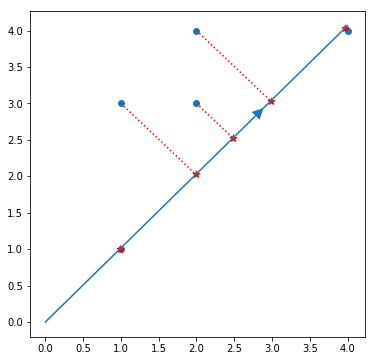

Данные после снижения размерности с помощью градиентного спуска:
 [1.44102097 2.89428806 3.60867548 5.76408386 4.33530903]
Данные после снижения размерности с помощью встроенной функции:
 [1.41421356 2.82842712 3.53553391 5.65685425 4.24264069]


In [5]:
#@markdown - **Представление взаимосвязь между исходными данными и данными после снижения размерности**
x_new = np.dot(w_v.T, x_input)
m = np.linspace(0, 4, 100)
k = w_v.flatten()[1] / w_v.flatten()[0]
n = k * m
x_p = (x_input[0] / k + x_input[1]) / (k + 1/k)
y_p = k * x_p
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
# Проекция
for x0, x1, y0, y1 in zip(x_input[0], x_p, x_input[1], y_p):
    ax.plot([x0, x1], [y0, y1], 'r:')
ax.scatter(x_input[0], x_input[1])
ax.scatter(x_p, y_p, s=52, c='r', marker='*')
ax.plot(m, n)
dx = 0.3
dy = k * 0.3
ax.arrow(x_p[2], y_p[2], dx, dy, head_width=0.15, head_length=0.15, ec='none')
# plt.grid()
plt.show()
print('Данные после снижения размерности с помощью градиентного спуска:\n', x_new.flatten())

#@markdown - **Снижения размерности данных с помощью вызова встроенной функции**
w, v = LA.eig(x_cov)
x_new1 = np.dot(v[:,0].T, x_input)
print('Данные после снижения размерности с помощью встроенной функции:\n', x_new1)